In [2]:
import pandas as pd
import numpy as np
import math
df = pd.read_csv("mtcars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
cor = df.corr()
cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


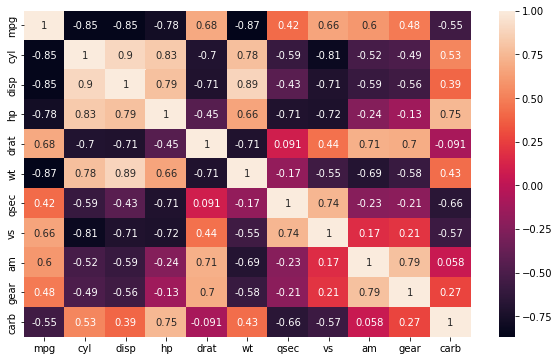

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [5]:
threshold=0.5
a=abs(cor['mpg'])
result=a[a>0.5]
result

mpg     1.000000
cyl     0.852162
disp    0.847551
hp      0.776168
drat    0.681172
wt      0.867659
vs      0.664039
am      0.599832
carb    0.550925
Name: mpg, dtype: float64

In [6]:
def correlation(a,b):
  x=y=x1=y1=0
  for i in range(len(df[a])):
    x=x+((df[a][i]-np.mean(df[a]))*(df[b][i]-np.mean(df[b])))
    x1=x1+((df[a][i]-np.mean(df[a]))**2)
    y1=y1+((df[b][i]-np.mean(df[b]))**2)
  co=x/math.sqrt(x1*y1)
  print(co)

In [7]:
df[['cyl','disp']].corr()

,cyl,disp
cyl,1.000000,0.902033
disp,0.902033,1.000000


In [10]:
correlation('cyl','disp')

0.9020328721469989


In [11]:
df[['cyl','hp']].corr()

,cyl,hp
cyl,1.000000,0.832447
hp,0.832447,1.000000


In [12]:
correlation('cyl','hp')

0.8324474527218194


In [13]:
df[['cyl','drat']].corr()

,cyl,drat
cyl,1.000000,-0.699938
drat,-0.699938,1.000000


In [14]:
correlation('cyl','drat')

-0.6999381138287699


In [15]:
df[['cyl','wt']].corr()

,cyl,wt
cyl,1.000000,0.782496
wt,0.782496,1.000000


In [16]:
correlation('cyl','wt')

0.7824957944632409


In [17]:
df[['wt','vs']].corr()

,wt,vs
wt,1.000000,-0.554916
vs,-0.554916,1.000000


In [18]:
correlation('wt','vs')

-0.5549156776639941


In [19]:
df[['wt','am']].corr()

,wt,am
wt,1.000000,-0.692495
am,-0.692495,1.000000


In [20]:
correlation('wt','am')

-0.6924952588394842


In [21]:
df[['wt','carb']].corr()

,wt,carb
wt,1.000000,0.427606
carb,0.427606,1.000000


In [23]:
correlation('wt','carb')

0.4276059377354872


In [24]:
df1=df.drop(['cyl','disp','hp','drat','vs','am'],1)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Unnamed: 0,mpg,wt,qsec,gear,carb
0,Mazda RX4,21.0,2.620,16.46,4,4
1,Mazda RX4 Wag,21.0,2.875,17.02,4,4
2,Datsun 710,22.8,2.320,18.61,4,1
3,Hornet 4 Drive,21.4,3.215,19.44,3,1
4,Hornet Sportabout,18.7,3.440,17.02,3,2
